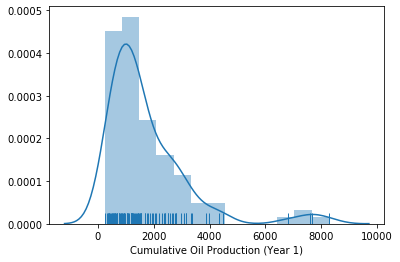

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import glob
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
WP = pd.read_csv('well production.csv')
WP['Cumulative Oil Production (Year 1)'] = WP.iloc[:,4:16].sum(axis=1)
WP= WP.sort_values('well name')
sns.distplot(WP['Cumulative Oil Production (Year 1)'], rug = True)
AM = 360
AA = AM*640




In [23]:
csv_files = glob.glob('Well Data/*.csv')
Peak6 = pd.read_csv('Well Data/Peak 6-217H.csv')
li = []
FN = []
TP = []
MPR = []
MPO = []
MPE = []
MP = []
MPOi = []
MT = []
ME = []
N = []
WS =[]
a = []


for files in csv_files:
    file = pd.read_csv(files)
    li.append(file.easting.max()-file.easting.min())
    FN.append(file['proppant weight (lbs)'].count())
    TP.append(file['proppant weight (lbs)'].sum())
    MP.append(file['proppant weight (lbs)'].mean())
    MPR.append(file['pump rate (cubic feet/min)'].mean())
    MPO.append(file['porosity'].mean())
    MPE.append(file['permeability'].mean())
    MPOi.append(file["Poisson's ratio"].mean())
    MT.append(file["thickness (ft)"].mean())
    N.append(file["northing"].mean())
    ME.append((file["easting"].max()+file['easting'].min())/2)
    WS.append(file['water saturation'].mean())
    a.append(file)
    
WP['Well Length'] = li
WP['Number of frac stages'] = FN
WP['Total Proppant weight (lbs)'] = TP
WP['Average Proppant weight (lbs) per stage'] = MP
WP['Average pump rate (cubic feet/min)'] = MPR
WP['Average Porosity'] = MPO
WP['Average Permeability'] = MPE
WP["Average Poisson's ratio"] = MPOi
WP['Average Thickness (ft)'] = MT
WP['Northing'] = N
WP['Middle Easting value'] = ME
WP['Average Water Saturation'] = WS

In [24]:
WP['Original Oil in Place'] = (7758*AA*WP['Average Thickness (ft)']*WP['Average Porosity']*(1-WP['Average Water Saturation']))/WP['formation volume factor']
WP['Recoverable Reserves'] = WP['Original Oil in Place']*WP['recovery factor']

In [25]:
Peak6.describe()
#sns.distplot(Peak6[""], rug = True)
#Peak6.permeability.describe()
#sns.distplot(Peak6.permeability, rug = True)

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,thickness (ft),proppant weight (lbs),pump rate (cubic feet/min)
count,100.000000,100.0,100.000000,100.00000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,81782.320000,1600.0,0.078500,0.02697,0.326620,6.277894e+06,0.081318,0.918682,27.492502,9.104229e+05,294.800448
std,2216.793798,0.0,0.013056,0.00999,0.003247,5.099620e+05,0.002052,0.002052,2.630183,4.516506e+05,51.187286
min,78000.000000,1600.0,0.040000,0.00700,0.321000,5.434035e+06,0.077797,0.914925,22.559422,1.862969e+04,179.223099
25%,79891.000000,1600.0,0.070000,0.01900,0.324000,5.832089e+06,0.079584,0.916989,25.279912,5.959234e+05,249.420366
50%,81782.500000,1600.0,0.080000,0.02600,0.327000,6.261940e+06,0.081276,0.918724,27.714355,8.342663e+05,296.918498
75%,83673.250000,1600.0,0.090000,0.03325,0.329000,6.721564e+06,0.083011,0.920416,29.845370,1.151494e+06,330.492695
max,85565.000000,1600.0,0.100000,0.05200,0.332000,7.162186e+06,0.085075,0.922203,31.432591,2.586512e+06,405.669215


In [26]:
WP['well name'].values

array(['Brisket 1-204H', 'Brisket 1-44H', 'Brisket 10-65H',
       'Brisket 2-149H', 'Brisket 3-212H', 'Brisket 6-50H',
       'Brisket 7-105H', 'Brisket 7-212H', 'Brisket 9-106H',
       'Burger 10-170H', 'Burger 2-179H', 'Burger 3-45H', 'Burger 6-148H',
       'Burger 6-59H', 'Dakota 10-199H', 'Dakota 13-166H',
       'Federal 12-111H', 'Federal 12-25H', 'Federal 14-113H',
       'Federal 3-123H', 'Federal 3-125H', 'Federal 7-130H',
       'Federal 8-142H', 'Federal 8-166H', 'Federal 8-38H',
       'Fennel 10-129H', 'Fennel 8-70H', 'Golden 1-209H',
       'Golden 11-109H', 'Golden 14-27H', 'Golden 4-21H', 'Golden 5-19H',
       'Golden 7-109H', 'Golden 8-162H', 'Golden 9-62H',
       'Gunnison 12-38H', 'Gunnison 13-160H', 'Gunnison 4-93H',
       'Gunnison 5-129H', 'Gunnison 7-24H', 'Gunnison 8-30H',
       'Johnson 7-3H', 'King 10-202H', 'King 12-179H', 'King 13-150H',
       'King 13-215H', 'King 13-28H', 'King 14-181H', 'King 14-184H',
       'King 2-120H', 'King 5-15H', 'King 7-1

In [27]:
WP.columns

Index(['well name', 'average pressure (Pa)', 'recovery factor',
       'formation volume factor', 'oil 1', 'oil 2', 'oil 3', 'oil 4', 'oil 5',
       'oil 6', 'oil 7', 'oil 8', 'oil 9', 'oil 10', 'oil 11', 'oil 12',
       'water 1', 'water 2', 'water 3', 'water 4', 'water 5', 'water 6',
       'water 7', 'water 8', 'water 9', 'water 10', 'water 11', 'water 12',
       'Cumulative Oil Production (Year 1)', 'Well Length',
       'Number of frac stages', 'Total Proppant weight (lbs)',
       'Average Proppant weight (lbs) per stage',
       'Average pump rate (cubic feet/min)', 'Average Porosity',
       'Average Permeability', 'Average Poisson's ratio',
       'Average Thickness (ft)', 'Northing', 'Middle Easting value',
       'Average Water Saturation', 'Original Oil in Place',
       'Recoverable Reserves'],
      dtype='object')

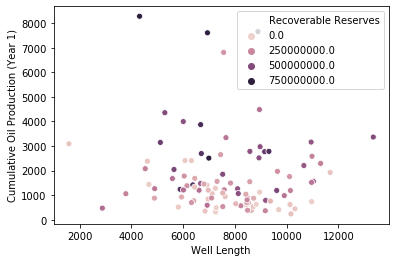

In [28]:
sns.scatterplot(WP['Well Length'], WP['Cumulative Oil Production (Year 1)'], hue = WP["Recoverable Reserves"])

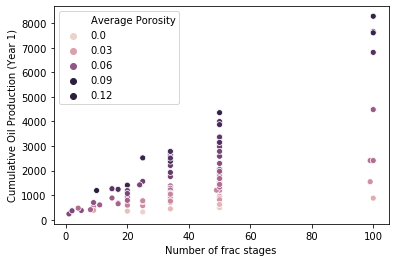

In [29]:

sns.scatterplot(WP['Number of frac stages'], WP['Cumulative Oil Production (Year 1)'],hue=WP['Average Porosity'])


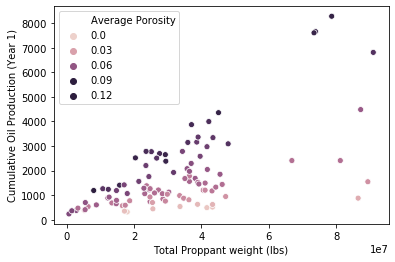

In [30]:
sns.scatterplot(WP['Total Proppant weight (lbs)'], WP['Cumulative Oil Production (Year 1)'], hue=WP["Average Porosity"])

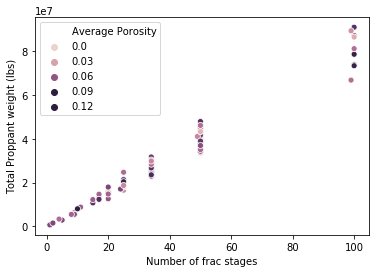

In [31]:
sns.scatterplot(WP['Number of frac stages'], WP['Total Proppant weight (lbs)'], hue = WP["Average Porosity"])

In [32]:
x = WP.drop('well name', axis =1)
X = x.drop('Cumulative Oil Production (Year 1)', axis = 1)
y = WP['Cumulative Oil Production (Year 1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state = 0)
clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


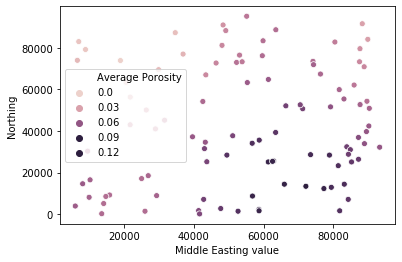

In [33]:
sns.scatterplot(WP['Middle Easting value'], WP['Northing'], hue = WP['Average Porosity'])

Text(0.5, 1.0, 'Porosity values')

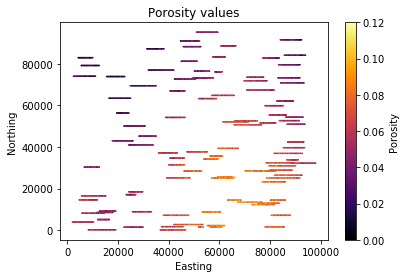

In [34]:
frame = pd.concat(a, axis=0, ignore_index=True, sort = False)
frame.head()
fig = plt.scatter(frame.easting.dropna(), frame.northing.dropna(),s = 0.1, c = frame.porosity.dropna(), cmap = 'inferno')
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.colorbar(label = "Porosity")
plt.title("Porosity values")

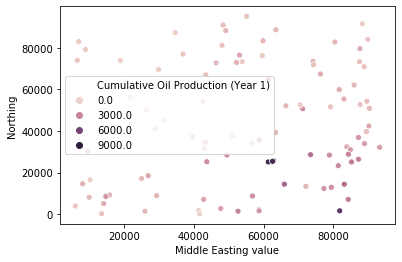

In [35]:
sns.scatterplot(WP['Middle Easting value'], WP['Northing'], hue = WP['Cumulative Oil Production (Year 1)'])

In [36]:
frame.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,thickness (ft),proppant weight (lbs),pump rate (cubic feet/min)
0,86600.0,33900.0,0.07,0.019,0.304,1.047748e+07,0.076219,0.923781,47.766092,929603.851175,269.739431
1,86646.0,33900.0,0.07,0.019,0.304,1.047748e+07,0.076219,0.923781,47.766092,NaN,NaN
2,86692.0,33900.0,0.07,0.019,0.304,1.048354e+07,0.075538,0.924462,47.446351,366353.828243,352.043256
3,86737.0,33900.0,0.07,0.019,0.304,1.048354e+07,0.075538,0.924462,47.446351,NaN,NaN
4,86783.0,33900.0,0.06,0.012,0.304,1.048962e+07,0.074861,0.925139,47.127395,87352.964636,300.275028
